# Minor Project - Twitter User Gender Classification

Here, Twitter user gender classification is done by building a artificial neural network using sklearn and tensorflow.

### Importing Libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset

In [2]:
# reading the dataset from csv file
df = pd.read_csv(r'C:\Users\Manjunath\gender_classifier.csv',encoding='latin-1')

In [3]:
# displaying 1st 3 rows of the dataset
df.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade


In [4]:
# summary statistics 
df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,1.536038e+05
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


In [5]:
# displaying all the column names in the dataset
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

### Feature Selection

In [6]:
# feature selection
data=pd.read_csv(r'C:\Users\Manjunath\gender_classifier.csv',usecols=[0,1,3,5,6,10,11,13,17,18,19,21],encoding='latin-1')

In [7]:
data.head(3)

,_unit_id,_golden,_trusted_judgments,gender,gender:confidence,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count
0,815719226,False,3,male,1.0000,i sing my own rhythm.,0,08C2C2,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,False,3,male,1.0000,I'm the author of novels filled with family dr...,68,0084B4,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,815719228,False,3,male,0.6625,louis whining and squealing and all,7696,ABB8C2,1,C0DEED,i absolutely adore when louis starts the songs...,5617


In [8]:
# information of the data selected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 12 columns):
_unit_id              20050 non-null int64
_golden               20050 non-null bool
_trusted_judgments    20050 non-null int64
gender                19953 non-null object
gender:confidence     20024 non-null float64
description           16306 non-null object
fav_number            20050 non-null int64
link_color            20050 non-null object
retweet_count         20050 non-null int64
sidebar_color         20050 non-null object
text                  20050 non-null object
tweet_count           20050 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 1.7+ MB


### Cleaning the Data

In [9]:
#cleaning the data
data['gender'] = data['gender'].replace('unknown',np.nan)
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15522 entries, 0 to 20049
Data columns (total 12 columns):
_unit_id              15522 non-null int64
_golden               15522 non-null bool
_trusted_judgments    15522 non-null int64
gender                15522 non-null object
gender:confidence     15522 non-null float64
description           15522 non-null object
fav_number            15522 non-null int64
link_color            15522 non-null object
retweet_count         15522 non-null int64
sidebar_color         15522 non-null object
text                  15522 non-null object
tweet_count           15522 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 1.4+ MB


In [11]:
data.isnull().any()

_unit_id              False
_golden               False
_trusted_judgments    False
gender                False
gender:confidence     False
description           False
fav_number            False
link_color            False
retweet_count         False
sidebar_color         False
text                  False
tweet_count           False
dtype: bool

In [12]:
data.gender.unique()

array(['male', 'female', 'brand'], dtype=object)

In [13]:
data.dtypes

_unit_id                int64
_golden                  bool
_trusted_judgments      int64
gender                 object
gender:confidence     float64
description            object
fav_number              int64
link_color             object
retweet_count           int64
sidebar_color          object
text                   object
tweet_count             int64
dtype: object

In [14]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])

### Exploratory Data Analysis (EDA)

In [15]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]

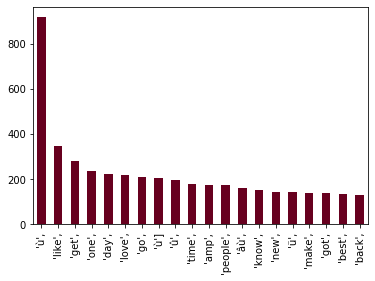

In [16]:
Female_Words.plot(kind='bar',stacked=True, colormap='RdBu')

The 1st 20 most used words by female is visiaulised in the above graph. 

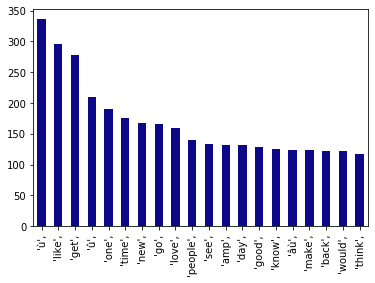

In [17]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

The 1st 20 most used words by men is visiaulised in the above graph. 

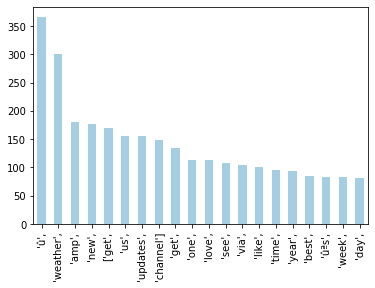

In [18]:
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')

The 1st 20 most used words by brand is visiaulised in the above graph. 

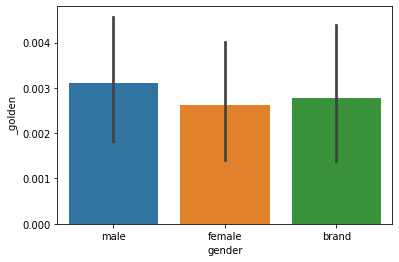

In [19]:
sns.barplot(x='gender',y='_golden',data=data)

more males are included in the gold standard for the model compared to females and brands.

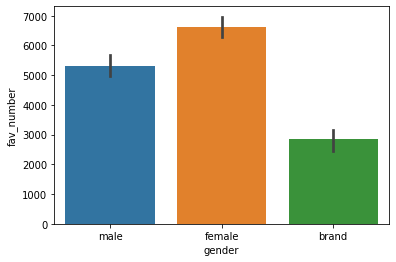

In [20]:
sns.barplot(x='gender',y='fav_number',data=data)

females have favorited the most number of tweets than males and brands.

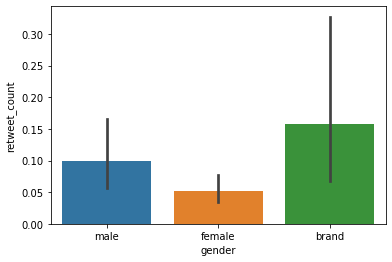

In [21]:
sns.barplot(x='gender',y='retweet_count',data=data)

brands have retweeted the most when compared to male and female.

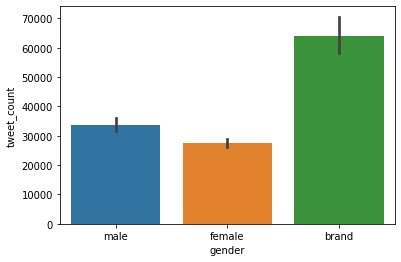

In [22]:
sns.barplot(x='gender',y='tweet_count',data=data)

brands have posted the most number of tweets than males and females.

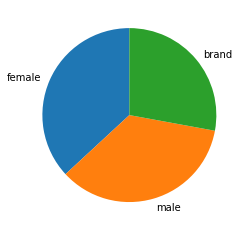

In [23]:
plt.pie(data.gender.value_counts(),labels=data.gender.value_counts().index, startangle=90)
plt.show()

There are almost equal number of male, female and brands.

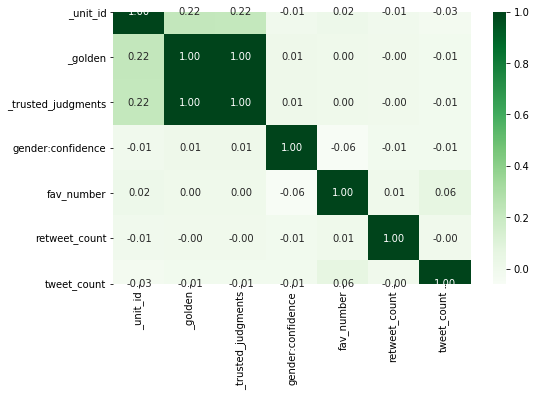

In [24]:
f,ax=plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),annot=True, fmt='.2f',cmap='Greens')

### Label Encoding

In [25]:
data.dtypes

_unit_id                int64
_golden                  bool
_trusted_judgments      int64
gender                 object
gender:confidence     float64
description            object
fav_number              int64
link_color             object
retweet_count           int64
sidebar_color          object
text                   object
tweet_count             int64
Tweets                 object
Description            object
dtype: object

In [26]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['_golden']=le.fit_transform(data['_golden'])
data['link_color']=le.fit_transform(data['link_color'])
data['sidebar_color']=le.fit_transform(data['sidebar_color'])

In [27]:
data.dtypes

_unit_id                int64
_golden                 int64
_trusted_judgments      int64
gender                  int32
gender:confidence     float64
description            object
fav_number              int64
link_color              int32
retweet_count           int64
sidebar_color           int32
text                   object
tweet_count             int64
Tweets                 object
Description            object
dtype: object

In [28]:
data.head(3)

,_unit_id,_golden,_trusted_judgments,gender,gender:confidence,description,fav_number,link_color,retweet_count,sidebar_color,text,tweet_count,Tweets,Description
0,815719226,0,3,2,1.0000,i sing my own rhythm.,0,230,0,511,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,815719227,0,3,2,1.0000,I'm the author of novels filled with family dr...,68,70,0,334,ÛÏIt felt like they were my friends and I was...,7471,"[ûïit, felt, like, friends, living, story, û, ...",i m the author of novels filled with family dr...
2,815719228,0,3,2,0.6625,louis whining and squealing and all,7696,1837,1,334,i absolutely adore when louis starts the songs...,5617,"[absolutely, adore, louis, starts, songs, hits...",louis whining and squealing and all


## Training the algorithm

In [29]:
# independent features
x=data[['_unit_id', '_golden', '_trusted_judgments',
       'gender:confidence', 'fav_number', 'link_color',
       'retweet_count', 'sidebar_color', 'tweet_count']]
# dependent feature
Y=data['gender'].values

In [30]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.3,random_state=30)

In [31]:
# scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Artificial Neural Network using sklearn

In [32]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=300,verbose=True)

In [33]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [34]:
mlpc.fit(X_train,Y_train) # training the data
Y_pred = mlpc.predict(X_test) # testing the data

Iteration 1, loss = 1.08493570
Iteration 2, loss = 1.05464122
Iteration 3, loss = 1.04527945
Iteration 4, loss = 1.03874223
Iteration 5, loss = 1.03246519
Iteration 6, loss = 1.02734951
Iteration 7, loss = 1.02248610
Iteration 8, loss = 1.01835262
Iteration 9, loss = 1.01514566
Iteration 10, loss = 1.01141646
Iteration 11, loss = 1.01058813
Iteration 12, loss = 1.00797475
Iteration 13, loss = 1.00626144
Iteration 14, loss = 1.00433395
Iteration 15, loss = 1.00325292
Iteration 16, loss = 1.00122833
Iteration 17, loss = 1.00094968
Iteration 18, loss = 0.99962330
Iteration 19, loss = 0.99980172
Iteration 20, loss = 0.99714589
Iteration 21, loss = 0.99725931
Iteration 22, loss = 0.99630130
Iteration 23, loss = 0.99601974
Iteration 24, loss = 0.99546327
Iteration 25, loss = 0.99424104
Iteration 26, loss = 0.99320195
Iteration 27, loss = 0.99306384
Iteration 28, loss = 0.99280583
Iteration 29, loss = 0.99168826
Iteration 30, loss = 0.99128208
Iteration 31, loss = 0.99075266
Iteration 32, los

In [35]:
# evaluating the algorithm using accuracy_score metrics
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.4809963495812755

### Artificial Neural Network using Tensorflow

In [36]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [37]:
model = keras.Sequential()
model.add(Dense(8,activation='relu'),)
model.add(Dense(3,))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [38]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
10865/10865 [==============================] - 1s 48us/sample - loss: 1.7023 - acc: 0.1731
Epoch 2/100
10865/10865 [==============================] - 0s 39us/sample - loss: 0.8936 - acc: 0.2734
Epoch 3/100
10865/10865 [==============================] - 0s 41us/sample - loss: 0.7135 - acc: 0.3577
Epoch 4/100
10865/10865 [==============================] - 0s 39us/sample - loss: 0.6710 - acc: 0.3922
Epoch 5/100
10865/10865 [==============================] - 0s 39us/sample - loss: 0.6524 - acc: 0.3905
Epoch 6/100
10865/10865 [==============================] - 0s 38us/sample - loss: 0.6413 - acc: 0.3795
Epoch 7/100
10865/10865 [==============================] - 0s 39us/sample - loss: 0.6327 - acc: 0.3868
Epoch 8/100
10865/10865 [==============================] - 0s 41us/sample - loss: 0.6262 - acc: 0.3800
Epoch 9/100
10865/10865 [==============================] - 0s 39us/sample - loss: 0.6213 - acc: 0.3983
Epoch 10/100
10865/10865 [==============================] - 0s 40us/sampl